<a href="https://colab.research.google.com/github/2391-hacker/-9-52/blob/main/books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!pip install scikit-network
!pip install netneurotools

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
import networkx as nx
import pandas as pd
import statistics
from collections import defaultdict
import matplotlib.pyplot as plt

from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, completeness_score
from sklearn.cluster import SpectralClustering

from sknetwork.clustering import KCenters
import networkx.algorithms.community as nx_comm
from netneurotools.modularity import get_modularity

import plotly.graph_objects as go
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
target_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/книги.csv',)

In [129]:
len(target_data)

4657

In [130]:
target_data

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [131]:
len(set(target_data))

4

In [132]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(target_data.title) # bow — bag of words (мешок слов)


In [133]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(bow)

KMeans(n_clusters=3)

In [134]:
press = kmeans.predict(bow)
press

array([0, 2, 1, ..., 0, 0, 0], dtype=int32)

In [135]:
target_data['cluster'] = press

In [136]:
target_data['cluster'].value_counts()

,count
cluster,
0,2614
2,1360
1,683


In [137]:
press.sum()

np.int64(3403)

In [138]:
target_data

,index,title,genre,summary,cluster
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,0
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",2
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,1
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,0
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,0
...,...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ...",0
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...,2
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be...",0
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ...",0


In [139]:
press == 1

array([False, False,  True, ..., False, False, False])

In [140]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [141]:
' '.join(target_data[target_data.cluster == 0].title)

'Drowned Wednesday Magic\'s Promise Taran Wanderer Thendara House Amber and Iron Queen of Demons Master Alvin Always Coming Home Dragon Rider Darkwalker on Moonshae Valiant : A Modern Tale of Faerie Yendi Fengshen Yanyi Magic Lessons Jarka Ruus Daggerspell Keeper Ptolemy\'s Gate Dragon War Emperor Mage Archangel Tarzan Triumphant Rushing to Paradise Heir Apparent Durandal Small Gods Hawk of May Tunnels A Feast for Crows Kindred Spirits House of Chains Wisdom\'s Daughter Slan Sword Quest Xone of Contention Wolfskin Lankar of Callisto Assassin\'s Quest Academ\'s Fury Desecration Ascendance Neverwinter Magic\'s Price Outcast Ratha and Thistle-chaser Peter Pan Pennterra Divine Hammer A Crown of Swords Confessor Abner & Me Destined Wild Energy Honoured Enemy Amber and Blood Legacy Don Rodriguez: Chronicles of Shadow Valley Alchemy Gate of Ivrel Night Whispers Princess Academy Foxmask High Deryni Tam Lin Wolf Brother Drome Fairest A Casa Genius Squad Neverwhere Castle Roogna Jingo Air Ashlin

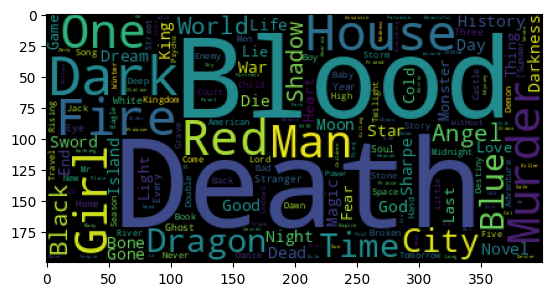

In [142]:
wc = WordCloud().generate(' '.join(target_data[target_data.cluster == 0].title))

plt.imshow(wc)

Похоже, это исторические  книги.

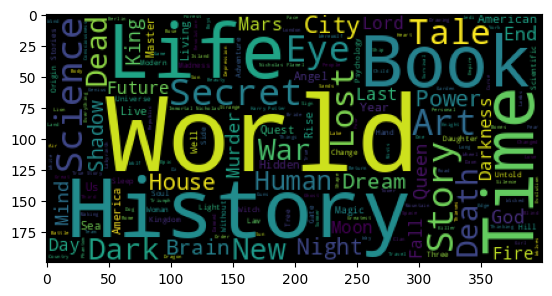

In [143]:
wc = WordCloud().generate(' '.join(target_data[target_data.cluster == 1].title))

plt.imshow(wc)

Кажется, это ужастики.

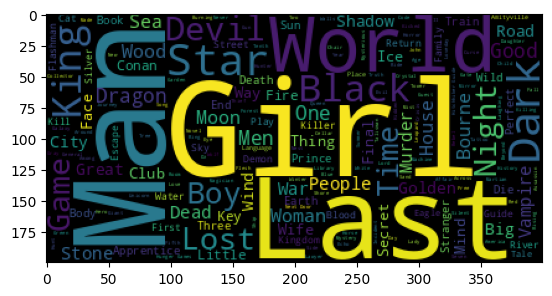

In [144]:
wc = WordCloud().generate(' '.join(target_data[target_data.cluster == 2].title))

plt.imshow(wc)

Это детективы.

In [145]:
kmins = KMeans(n_clusters=10)
kmins.fit(bow)

KMeans(n_clusters=10)

In [168]:
igoninskijzvon = kmins.predict(bow)
igoninskijzvon

array([4, 3, 5, ..., 4, 4, 4], dtype=int32)

In [169]:
target_data['claster'] = igoninskijzvon

In [167]:
target_data['clasterrrr'].value_counts()

,count
clasterrrr,
1,2231
7,1100
5,579
2,396
0,193
3,116
8,28
4,9
6,3


# Делаем облака слов для 10 типов названий

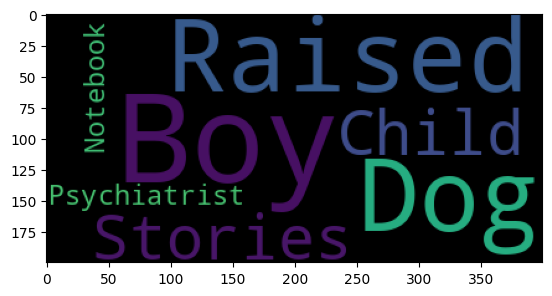

In [149]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 0].title))

plt.imshow(wc)

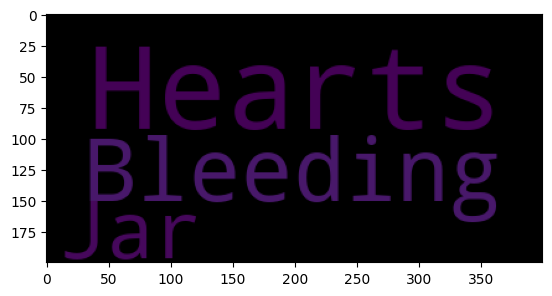

In [150]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 1].title))

plt.imshow(wc)

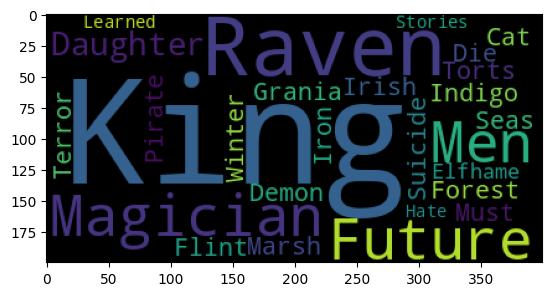

In [151]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 2].title))

plt.imshow(wc)

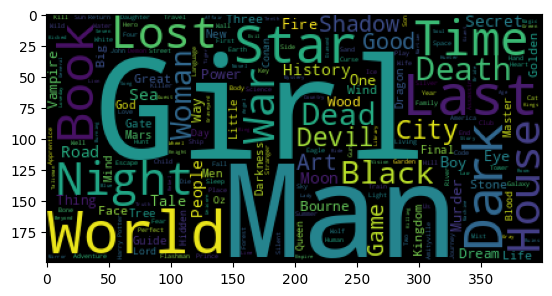

In [152]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 3].title))

plt.imshow(wc)

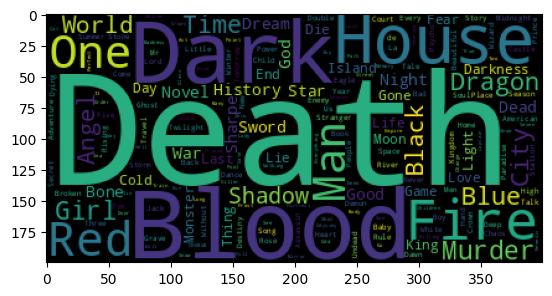

In [153]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 4].title))

plt.imshow(wc)

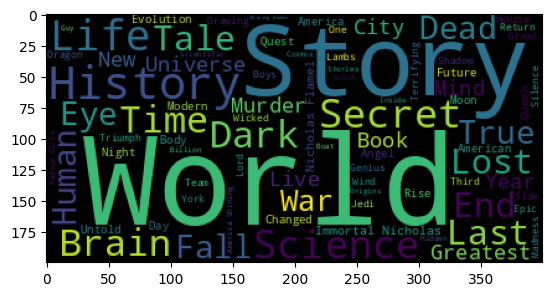

In [154]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 5].title))

plt.imshow(wc)

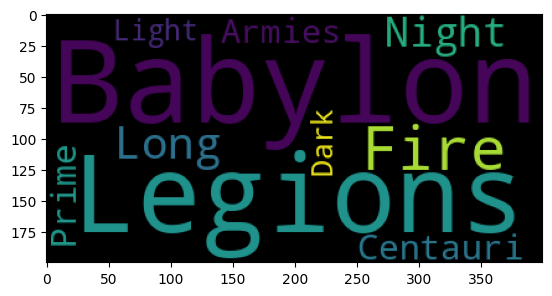

In [155]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 6].title))

plt.imshow(wc)

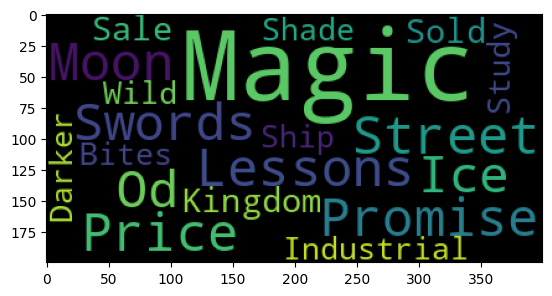

In [156]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 7].title))

plt.imshow(wc)

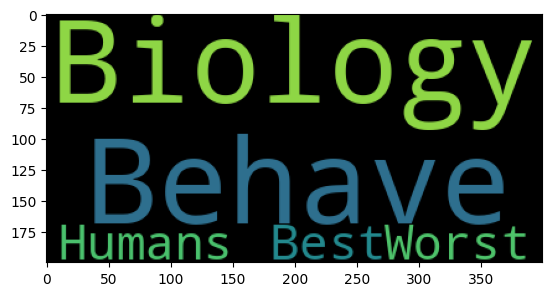

In [157]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 8].title))

plt.imshow(wc)

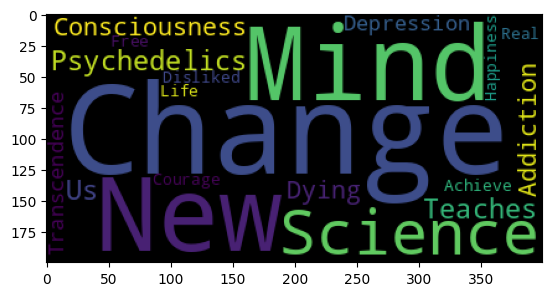

In [158]:
wc = WordCloud().generate(' '.join(target_data[target_data.claster == 9].title))

plt.imshow(wc)

Из таких облак слов не понять жанр.

# Пытаемся угадать жанр по тексту

In [200]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(target_data.summary) # bow — bag of words (мешок слов)

In [201]:
kmeaowns = KMeans(n_clusters=10)
kmeaowns.fit(bow)

KMeans(n_clusters=10)

In [202]:
prss = kmeaowns.predict(bow)
prss

array([0, 1, 0, ..., 2, 0, 2], dtype=int32)

In [203]:
target_data['classter'] = prss

In [204]:
target_data['classter']

,classter
0,0
1,1
2,0
3,1
4,0
...,...
4652,0
4653,0
4654,2
4655,0


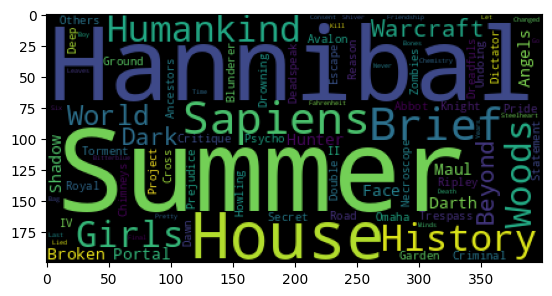

In [207]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

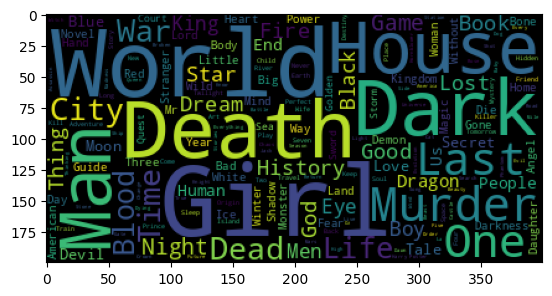

In [209]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

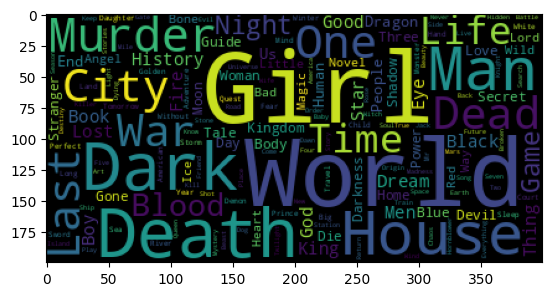

In [210]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

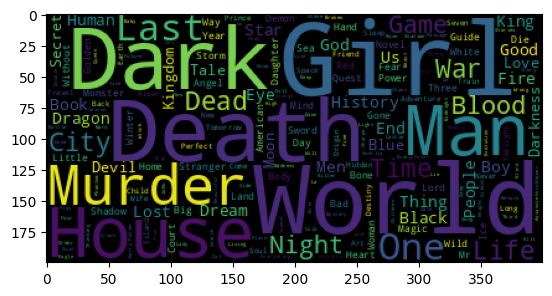

In [212]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

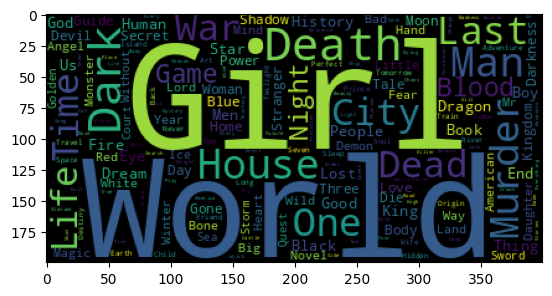

In [211]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

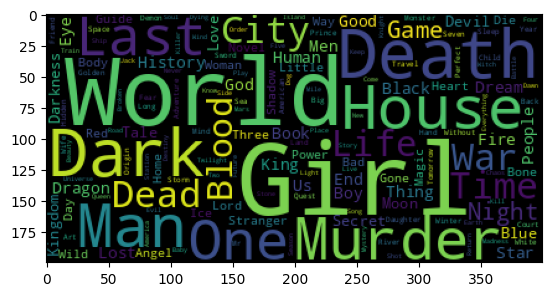

In [213]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

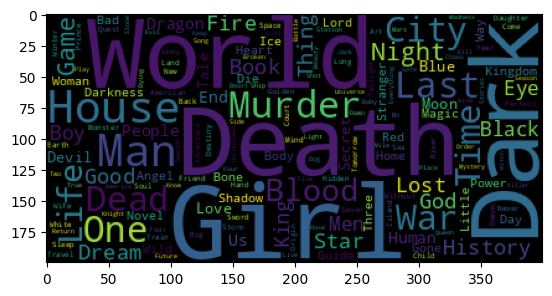

In [214]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

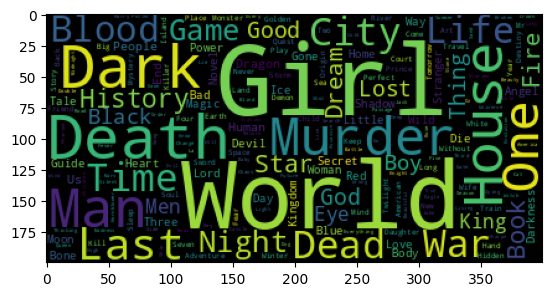

In [215]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

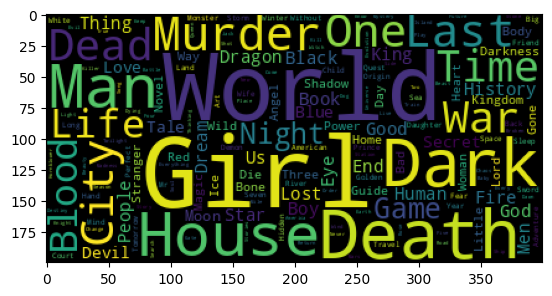

In [216]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

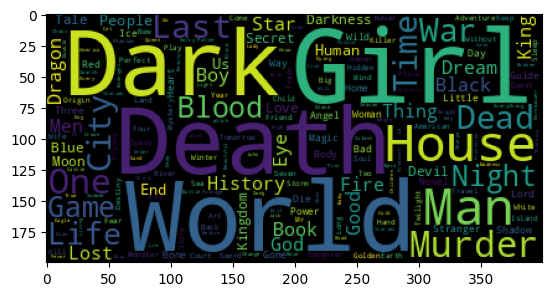

In [217]:
wc = WordCloud().generate(' '.join(target_data[target_data.classter == 0].title))

plt.imshow(wc)

Кластеризация здесь работает довольно загадочно, так как почти везде преобладают 3 слова: мир, девушка и смерть.



In [219]:
import seaborn as sns

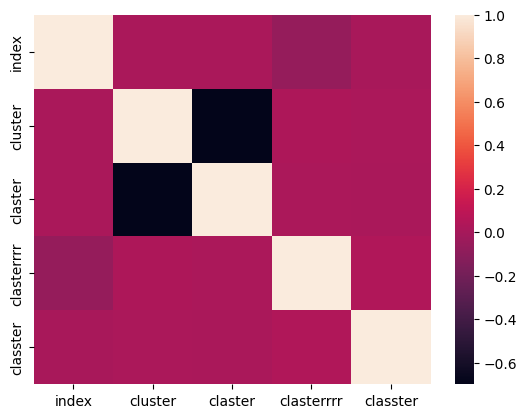

In [221]:
sns.heatmap(target_data.corr(numeric_only=True));